## Tasca S5 T02

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

**Exercicis de Train-Test amb ScikitLearn a partir d'un dataset amb informació sobre les vivendes de Houston.**

In [2]:
#cargar el dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv("dataset/housing data.csv", index_col = None, header = None, names = column_names)
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


**Relevant Information:** Concerns housing values in suburbs of Boston.

**Number of Instances:** 506

**Number of Attributes:** 13 continuous attributes (including "class" attribute "MEDV"), 1 binary-valued attribute.

**Attribute Information:**

    1. CRIM: per capita crime rate by town
    2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
    3. INDUS: proportion of non-retail business acres per town
    4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    5. NOX: nitric oxides concentration (parts per 10 million)
    6. RM: average number of rooms per dwelling
    7. AGE: proportion of owner-occupied units built prior to 1940
    8. DIS: weighted distances to five Boston employment centres
    9. RAD: index of accessibility to radial highways
    10. TAX: full-value property-tax rate per 10,000 dollars
    11. PTRATIO: pupil-teacher ratio by town
    12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
    13. LSTAT: % lower status of the population
    14. MEDV: Median value of owner-occupied homes in $1000s.
    


Estudiamos el conjunto a nivel descriptivo y vemos la correlación de las diferentes variables.

In [3]:
data1 = df.describe().transpose()
data1[["mean", "std", "min", "max"]]

,mean,std,min,max
CRIM,3.613524,8.601545,0.00632,88.9762
ZN,11.363636,23.322453,0.00000,100.0000
INDUS,11.136779,6.860353,0.46000,27.7400
CHAS,0.069170,0.253994,0.00000,1.0000
NOX,0.554695,0.115878,0.38500,0.8710
RM,6.284634,0.702617,3.56100,8.7800
AGE,68.574901,28.148861,2.90000,100.0000
DIS,3.795043,2.105710,1.12960,12.1265
RAD,9.549407,8.707259,1.00000,24.0000
TAX,408.237154,168.537116,187.00000,711.0000


<AxesSubplot:>

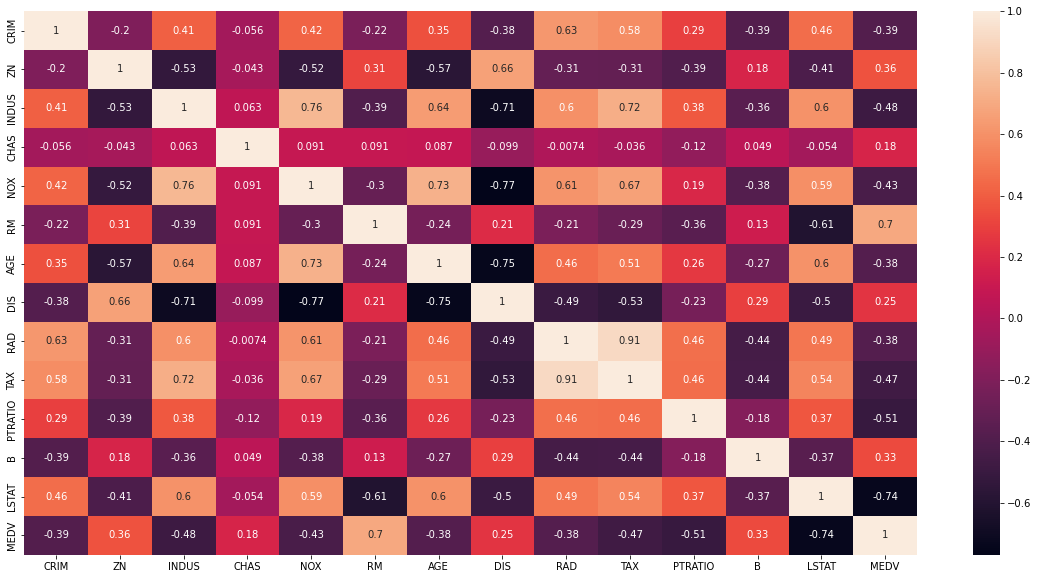

In [4]:
#correlación de la variables
corr_matrix = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, annot=True)

En este primer análisis, nos permitiremos el tiempo de analizar nuestra base datos en relación a la columna objetivo **MEDV**, tal y como veremos más adelante.  

Si prestamos atención podemos ver dos variables que se relacionan directamente con el precio de la vivienda:
* **LSTAT**, con el porcentaje de población con menos ingresos.
* **RM**, promedio de habitaciones por vivienda. ^Podemos suponer que las casas con más habitaciones, o lo  que es lo mismo, las casas más grandes tienen un valor más alto ya que pueden albergar a más gente.


### Exercici 1

*Parteix el conjunt de dades adjunt en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.*  
*També adjunt trobaràs una descripció de les diferents variables del dataset.*

Procedemos con la división del conjunto de la siguiente manera: 80% Train y 20% Test.

In [5]:
# split into inputs and outputs
x = df.loc[:, column_names[:-1]] #features
y = df.loc[:, column_names[-1]] #target

# split into train test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(404, 13) (102, 13) (404,) (102,)


Vemos primero el conjunto del *Train*:

In [6]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 220 to 172
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 44.2 KB


In [7]:
x_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.386324,11.794554,11.123441,0.069307,0.555886,6.301797,69.027228,3.770242,9.403465,402.844059,18.462376,358.785446,12.706188
std,8.137943,23.636906,6.993011,0.254290,0.115201,0.694692,28.106955,2.080583,8.661147,170.857022,2.194821,88.663438,7.299031
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.174200,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.078935,0.000000,5.130000,0.000000,0.449000,5.887750,45.675000,2.087875,4.000000,276.000000,17.400000,376.132500,6.727500
50%,0.256510,0.000000,9.125000,0.000000,0.538000,6.211000,77.950000,3.190950,5.000000,322.000000,19.100000,391.600000,11.300000
75%,3.359357,20.000000,18.100000,0.000000,0.631000,6.675000,93.900000,5.141475,24.000000,666.000000,20.200000,396.060000,17.112500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


Y repetimos la operación, ahora con el conjunto del *Test*

In [8]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 329 to 108
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     102 non-null    float64
 1   ZN       102 non-null    float64
 2   INDUS    102 non-null    float64
 3   CHAS     102 non-null    int64  
 4   NOX      102 non-null    float64
 5   RM       102 non-null    float64
 6   AGE      102 non-null    float64
 7   DIS      102 non-null    float64
 8   RAD      102 non-null    int64  
 9   TAX      102 non-null    float64
 10  PTRATIO  102 non-null    float64
 11  B        102 non-null    float64
 12  LSTAT    102 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 11.2 KB


In [9]:
x_test.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,4.513411,9.656863,11.189608,0.068627,0.549979,6.216657,66.783333,3.893275,10.127451,429.598039,18.428431,348.311176,12.442647
std,10.230340,22.061680,6.339877,0.254068,0.118982,0.732735,28.382215,2.210300,8.907302,158.010105,2.052498,101.085667,6.507064
min,0.013600,0.000000,0.740000,0.000000,0.392000,3.863000,8.400000,1.129600,1.000000,224.000000,12.600000,2.600000,1.920000
25%,0.094115,0.000000,5.885000,0.000000,0.448000,5.881000,39.625000,2.135475,4.000000,304.000000,16.900000,366.755000,8.027500
50%,0.249035,0.000000,9.900000,0.000000,0.520000,6.157000,72.550000,3.347500,5.000000,384.000000,18.700000,390.680000,11.550000
75%,5.178705,0.000000,18.100000,0.000000,0.605000,6.469000,95.200000,5.186050,24.000000,666.000000,20.200000,396.900000,15.705000
max,73.534100,85.000000,21.890000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,666.000000,21.200000,396.900000,37.970000


Para facilitar el proceso, y con el objetivo de analizar y comparar los resultados de train y test, agrupamos los datos de media y desviación estándar.  
Un error en este paso podria dañar el análisis si se manejan incorrectamente los datos.

In [10]:
data2 = {'data_mean':data1["mean"], 
         'data_std':data1["std"],
         'train_mean':x_train.mean(),
         'train_std':x_train.std(),
         'test_mean':x_test.mean(),
         'test_std':x_test.std(),
        }        

plotdata = pd.DataFrame(data2, index=["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"])
plotdata.round(2)

,data_mean,data_std,train_mean,train_std,test_mean,test_std
CRIM,3.61,8.60,3.39,8.14,4.51,10.23
ZN,11.36,23.32,11.79,23.64,9.66,22.06
INDUS,11.14,6.86,11.12,6.99,11.19,6.34
CHAS,0.07,0.25,0.07,0.25,0.07,0.25
NOX,0.55,0.12,0.56,0.12,0.55,0.12
RM,6.28,0.70,6.30,0.69,6.22,0.73
AGE,68.57,28.15,69.03,28.11,66.78,28.38
DIS,3.80,2.11,3.77,2.08,3.89,2.21
RAD,9.55,8.71,9.40,8.66,10.13,8.91
TAX,408.24,168.54,402.84,170.86,429.60,158.01


<AxesSubplot:title={'center':'Std\n'}>

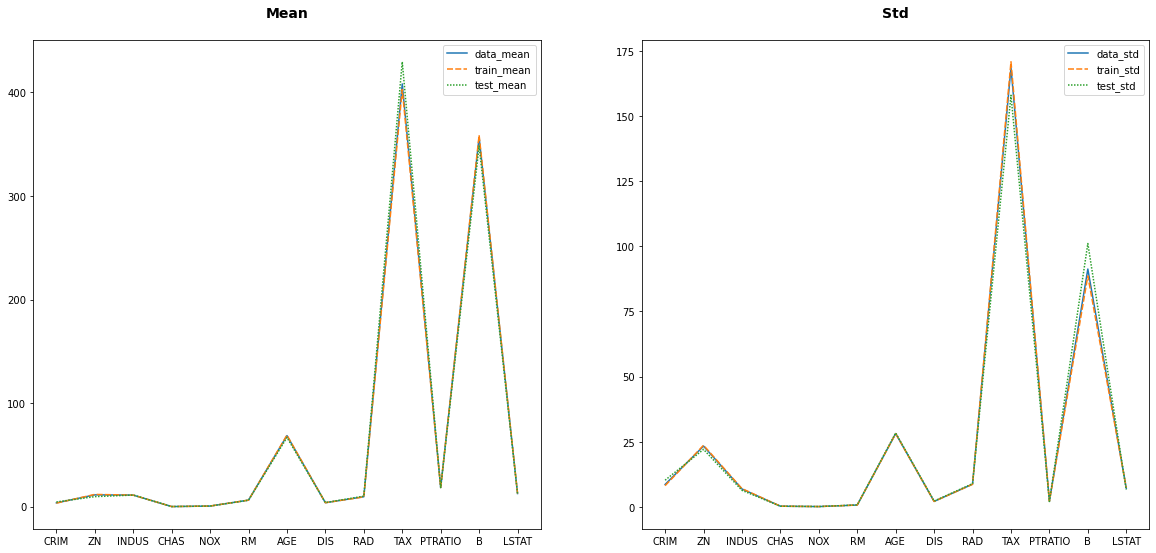

In [29]:
plotdata1 = plotdata[["data_mean", "train_mean", "test_mean"]]
plotdata2 = plotdata[["data_std", "train_std", "test_std"]]

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(20, 9))
axes = axes.flat
axes[0].set_title("Mean\n", fontsize = 14, fontweight = "bold")
sns.lineplot(data=plotdata1,ax=axes[0])
axes[1].set_title("Std\n", fontsize = 14, fontweight = "bold")
sns.lineplot(data=plotdata2,ax=axes[1])

Analizados y comparados los datos obtenidos damos por buena la compresión de datos para pasar a su procesado.

### Exercici 2

*Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).*

Ahora que tenemos los datos con los que vamos a trabajar, el primer paso será realizar una exploración del conjunto de datos. Esta revisión nos servirá para evitar errores en el análisis de los datos y en el proceso de modelado.

Se tendrá en cuenta lo siguiente:

* Si son gaussianas - Estandarización
* Si su distrubición NO es normal - Normalización
* Si son categóricas - Dummys o enumeración
* Otros: Poliformismo, transformaciones, cíclicas..

Text(0.5, 0.98, 'Distribución de las Variables Numéricas')

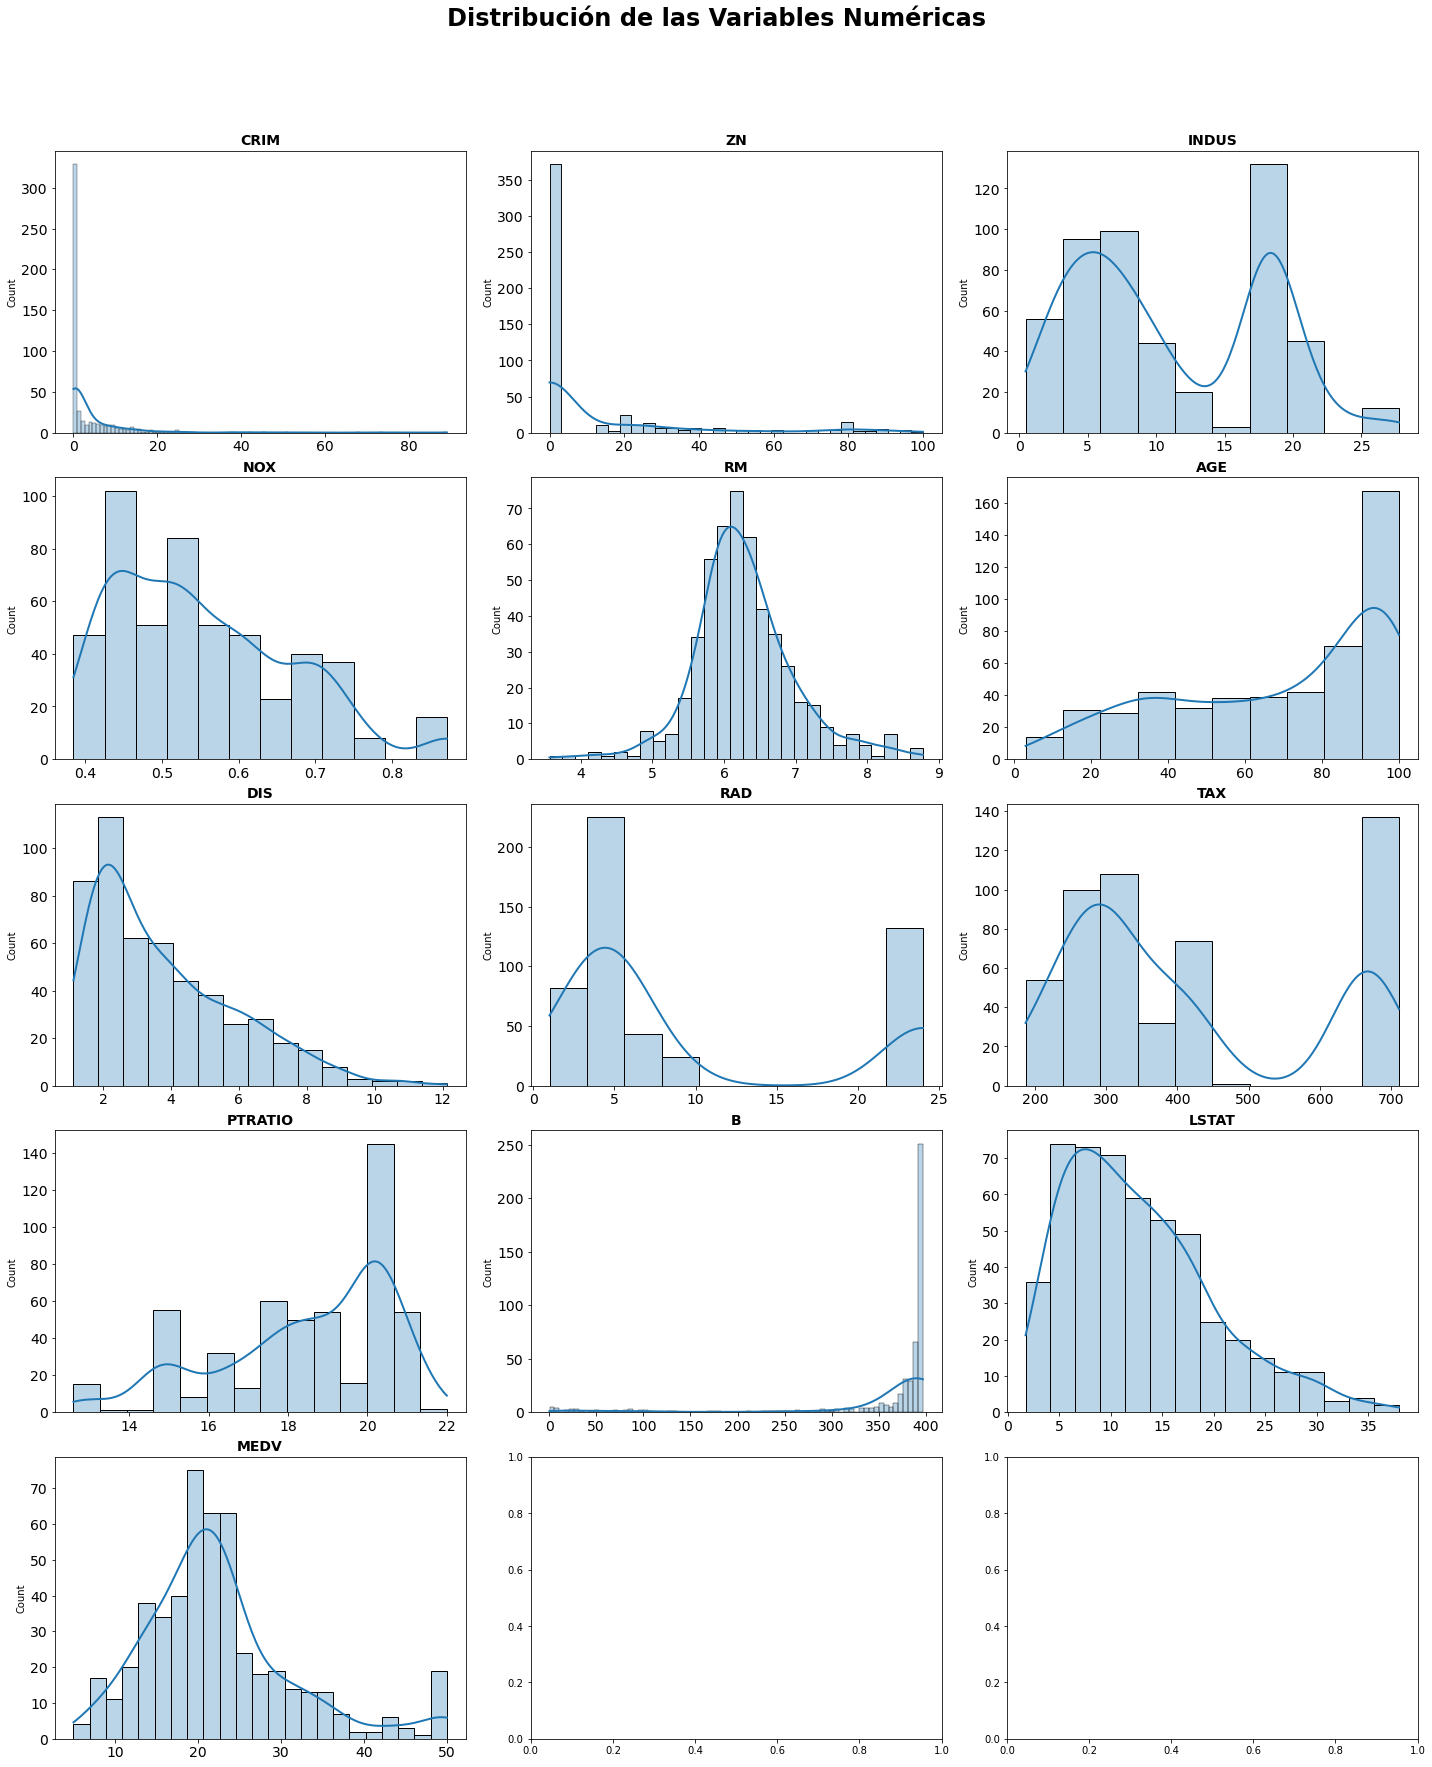

In [12]:
# Distribución gráfica de cada variable numérica

fig, axes = plt.subplots(ncols=3, nrows=5, figsize=(20, 25))
axes = axes.flat
#columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns
columnas = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

for i, colum in enumerate(columnas):
    sns.histplot(data = df, x= colum, stat= "count", kde = True,line_kws= {'linewidth': 2}, alpha   = 0.3, ax = axes[i])
    axes[i].set_title(colum, fontsize = 14, fontweight = "bold")
    axes[i].tick_params(labelsize = 14)
    axes[i].set_xlabel("")
       
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución de las Variables Numéricas', fontsize = 24, fontweight = "bold")

A primera vista, se intuye que la variable **RM** pueda ser la única que presente una distribución normal. No obstante, realizaremos el test de *shapiro-wilk* para confirmar o descartar la hiótesis de que columnes del dataset corresponen a datos gaussianos para poder realizar la Estandarización.

Nota: no incluimos la variable **CHAS** por tratarse de una categorica dummy.

In [13]:
for c in df:
    stat, p = shapiro(df[c])
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print(c + ' Probably Gaussian\n')
    else:
        print(c + ' Probably NOT Gaussian\n')

stat=0.450, p=0.000
CRIM Probably NOT Gaussian

stat=0.556, p=0.000
ZN Probably NOT Gaussian

stat=0.900, p=0.000
INDUS Probably NOT Gaussian

stat=0.275, p=0.000
CHAS Probably NOT Gaussian

stat=0.936, p=0.000
NOX Probably NOT Gaussian

stat=0.961, p=0.000
RM Probably NOT Gaussian

stat=0.892, p=0.000
AGE Probably NOT Gaussian

stat=0.903, p=0.000
DIS Probably NOT Gaussian

stat=0.680, p=0.000
RAD Probably NOT Gaussian

stat=0.815, p=0.000
TAX Probably NOT Gaussian

stat=0.904, p=0.000
PTRATIO Probably NOT Gaussian

stat=0.477, p=0.000
B Probably NOT Gaussian

stat=0.937, p=0.000
LSTAT Probably NOT Gaussian

stat=0.917, p=0.000
MEDV Probably NOT Gaussian



Como vemos en los resultados, se descarta la hipótesis nula ya que en el conjunto de datos no se presentant ninguna distribución normal y, por lo tanto, no podemos aplicar la estandarización en los datos.

Procesos de ingenieria a aplicar:

* Las variables **INDUS**, **NOX**, **AGE**, **TAX** *NO* tienen una distribución normal, utilizaremos la ***normalización***. 
* Las variables **CRIM**, **ZN**, **RM**,**DIS**, **PTRATIO**, **B**, **LSTAT** tienen *outliers*, por lo tanto se hará ***RobustScaler***.  
* La variable **RAD** es un array con ordenación numerica ([ 1,  2,  3,  5,  4,  8,  6,  7, 24], se puede plantear crear columnas dummies.
* La variable **CHAS** es categórica "dummie", ya aplicada en el modelo de datos *(= 1 if tract bounds river; 0 otherwise)*. 

In [14]:
#MinMaxScaler para la normalización
normColumns = ['INDUS','NOX','AGE', 'TAX']
scalerNorm = preprocessing.MinMaxScaler().fit(x_train[normColumns])
x_test[normColumns] = scalerNorm.transform(x_test[normColumns])

#RobustScaler para las variables con outliers
robColumns = ['CRIM', 'ZN', 'RM', 'DIS', 'PTRATIO', 'B', 'LSTAT']
robustScaler = preprocessing.RobustScaler().fit(x_train[robColumns])
x_test[robColumns] = robustScaler.transform(x_test[robColumns])

#Creamos columnas dummies
df = pd.get_dummies(df, columns=["RAD"],drop_first = False)
df = pd.get_dummies(df, columns=["CHAS"],drop_first = False)
x_test = x_test.drop('RAD', axis=1) #eliminamos la variable RAD para no distorsionar los datos del modelo
x_test = x_test.drop('CHAS', axis=1) #eliminamos la variable RAD para no distorsionar los datos del modelo

### Exercici 3

*Resumeix les noves columnes generades de manera estadística i gràfica*

Con el conjunto de datos procesados pasamos a su exploración. En primer lugar vemos la parte estadística:

In [15]:
x_test.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,1.297669,0.482843,0.393314,0.339464,0.007186,0.657913,0.229999,0.462973,-0.239846,-2.172316,0.110029
std,3.118604,1.103084,0.232400,0.244820,0.930752,0.292299,0.723834,0.301546,0.733035,5.072672,0.626583
min,-0.074048,0.000000,0.010264,0.014403,-2.982534,0.056643,-0.675056,0.070611,-2.321429,-19.520763,-0.903226
25%,-0.049504,0.000000,0.198864,0.129630,-0.419181,0.378218,-0.345649,0.223282,-0.785714,-1.246770,-0.315118
50%,-0.002279,0.000000,0.346041,0.277778,-0.068593,0.717302,0.051267,0.375954,-0.142857,-0.046167,0.024073
75%,1.500476,0.000000,0.646628,0.452675,0.327723,0.950566,0.653360,0.914122,0.392857,0.265964,0.424169
max,22.337851,4.250000,0.785557,1.000000,3.193395,1.000000,2.462454,0.914122,0.750000,0.265964,2.568127


Y gráfica

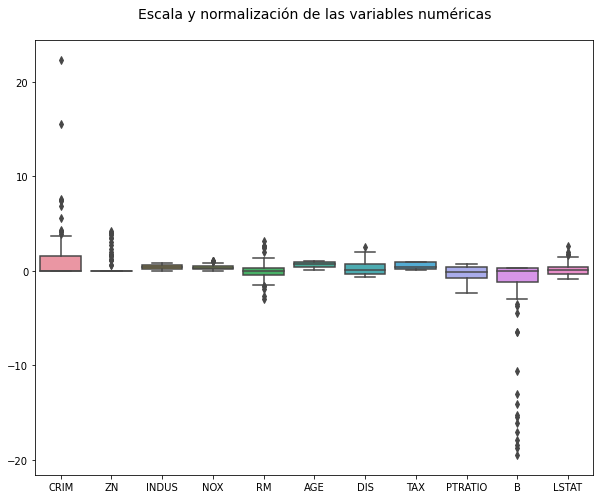

In [27]:
#plot it
plt.figure(figsize=(10, 8))
sns.boxplot(data=x_test)
plt.title('Escala y normalización de las variables numéricas\n', size = 14)
plt.show()

Como vemos en la gráfica, los datos se han escalado. Lo que es importante si necesitamos especificar que una modificación en una cantidad no es igual a otra modificación en otra. 

A continuación, podemos ver con más detalle los datos transformados con la normalización: 

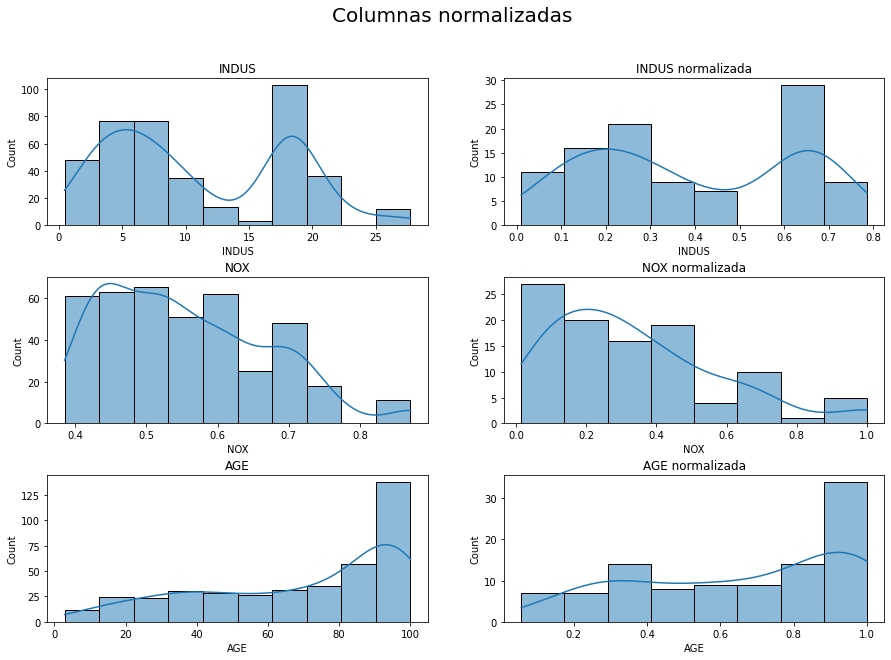

In [17]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.35)
plt.suptitle("Normalización", size = 20)

plt.subplot(3,2,1)
sns.histplot(data = x_train['INDUS'], kde = True)
plt.title('INDUS')

plt.subplot(3,2,2)
sns.histplot(data = x_test['INDUS'], kde = True)
plt.title('INDUS normalizada')

plt.subplot(3,2,3)
sns.histplot(data = x_train['NOX'], kde = True)
plt.title('NOX')

plt.subplot(3,2,4)
sns.histplot(data = x_test['NOX'], kde = True)
plt.title('NOX normalizada');

plt.subplot(3,2,5)
sns.histplot(data = x_train['AGE'], kde = True)
plt.title('AGE')

plt.subplot(3,2,6)
sns.histplot(data = x_test['AGE'],  kde = True)
plt.title('AGE normalizada');

Por últimos, veamos represantos algunos datos de las columnas dummies creadas.

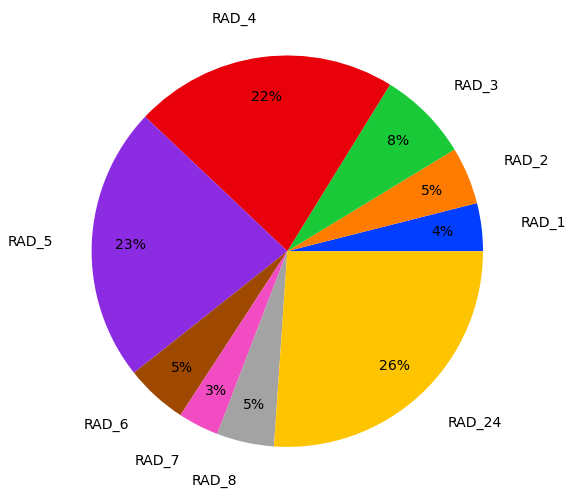

In [18]:
# Create a dataset
dummy = df.filter(like='RAD_') #seleccionamos todas las columnas de interés
data9 = dummy.sum()

# plot it
colors = sns.color_palette('bright')
plt.figure(figsize=(16, 9))
plt.pie(data9.values, labels=data9.index, colors = colors, autopct = '%0.0f%%', pctdistance=.8, labeldistance=1.2, textprops = {'color': 'Black','fontsize':14},)

plt.show()